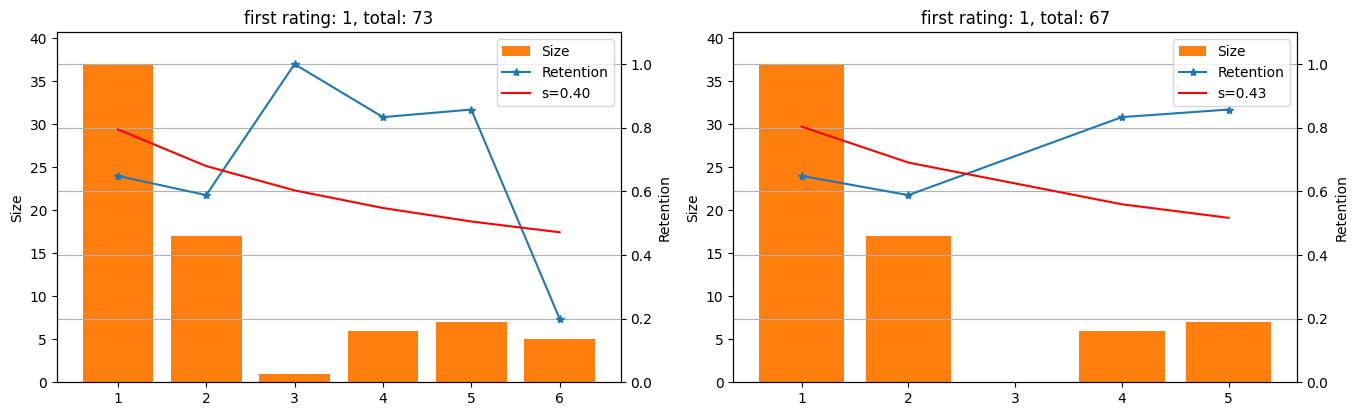

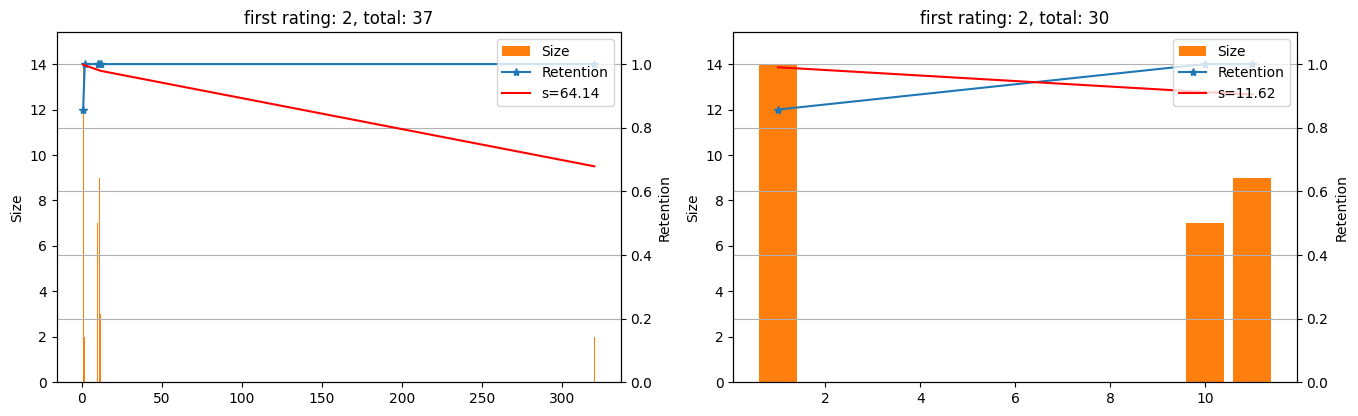

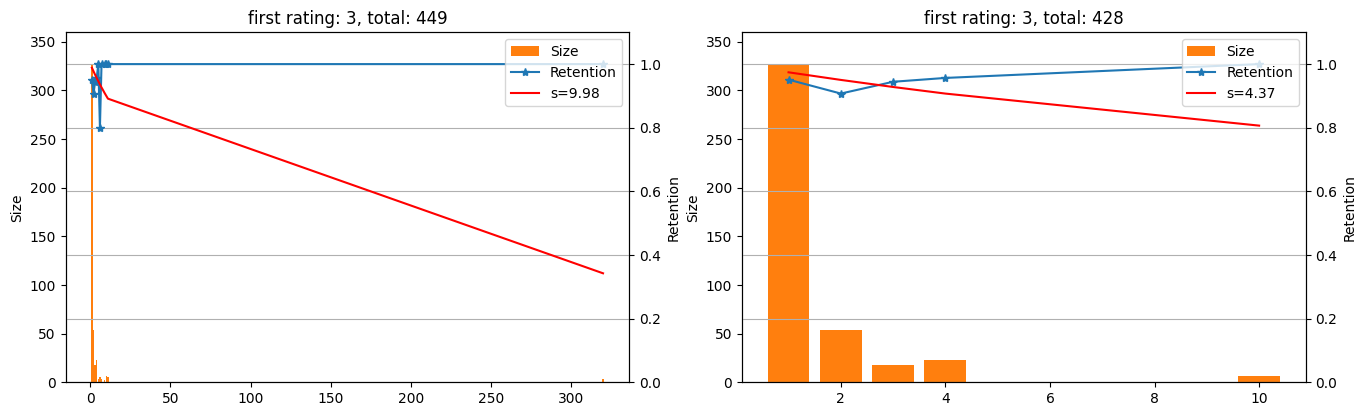

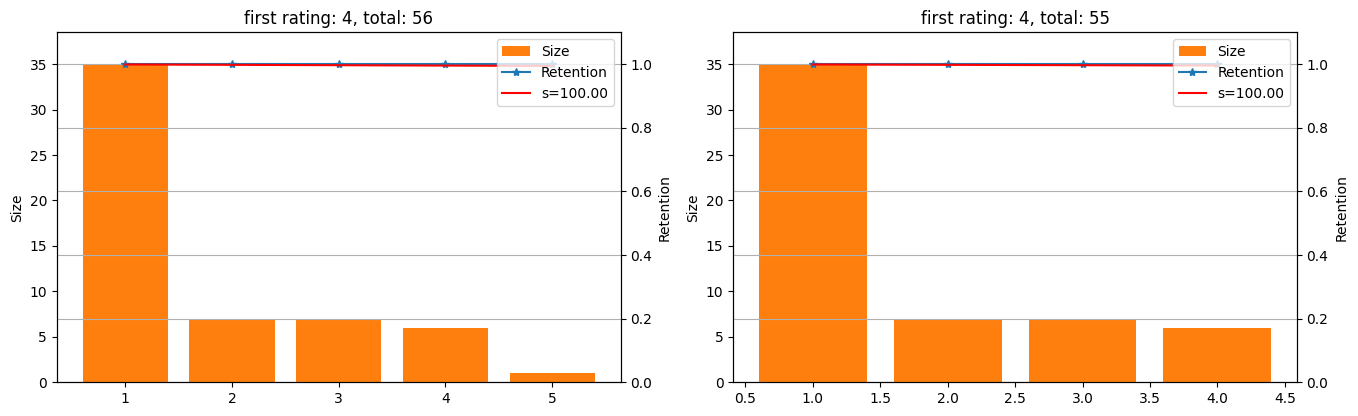

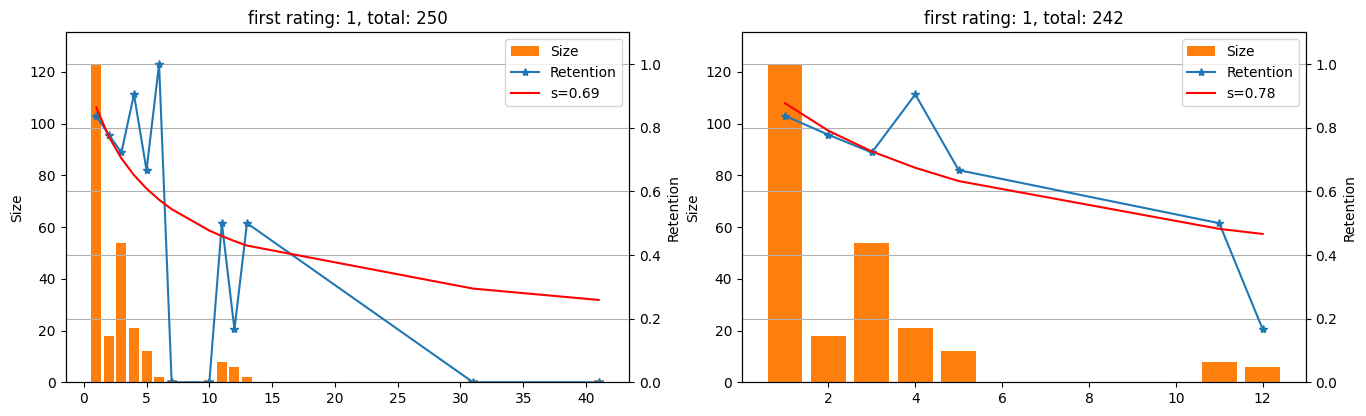

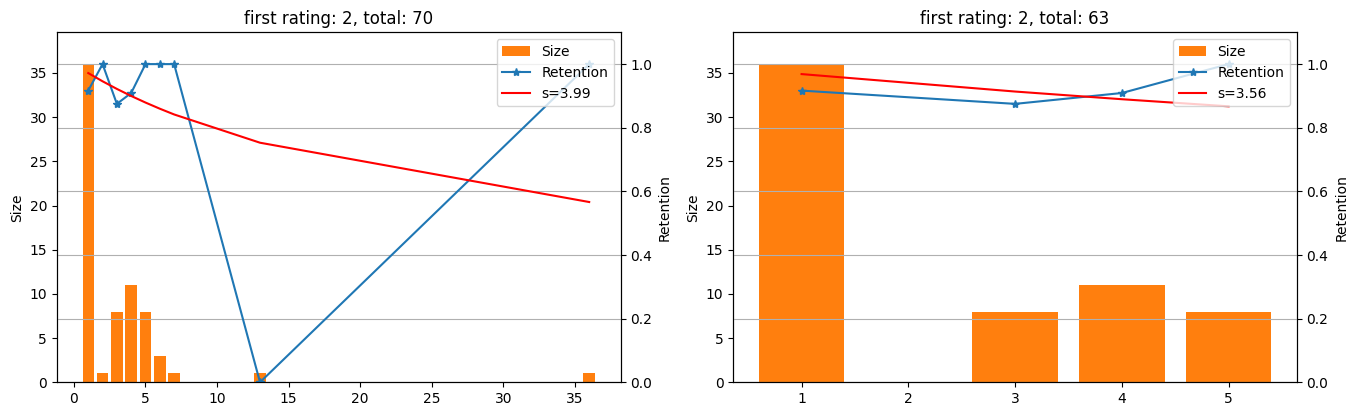

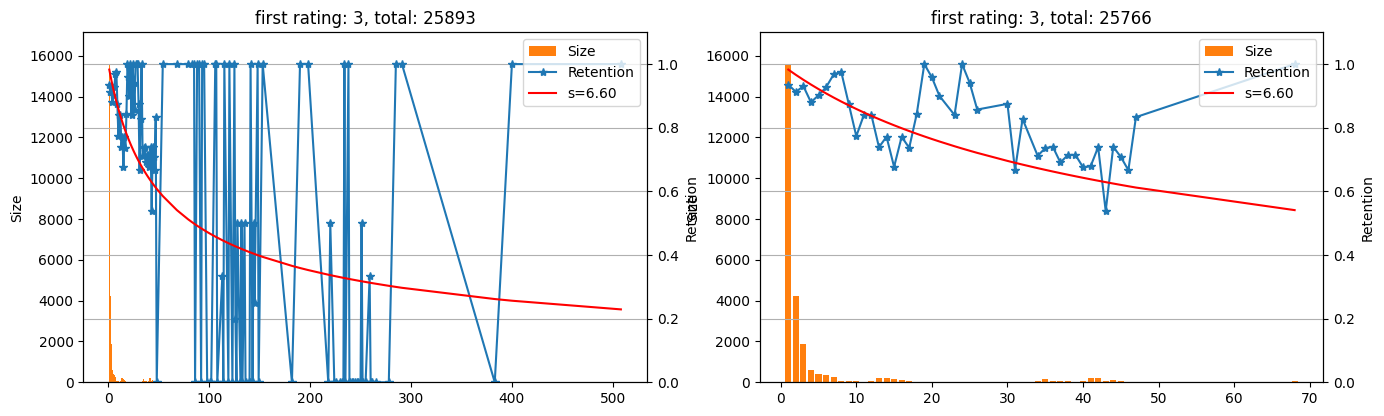

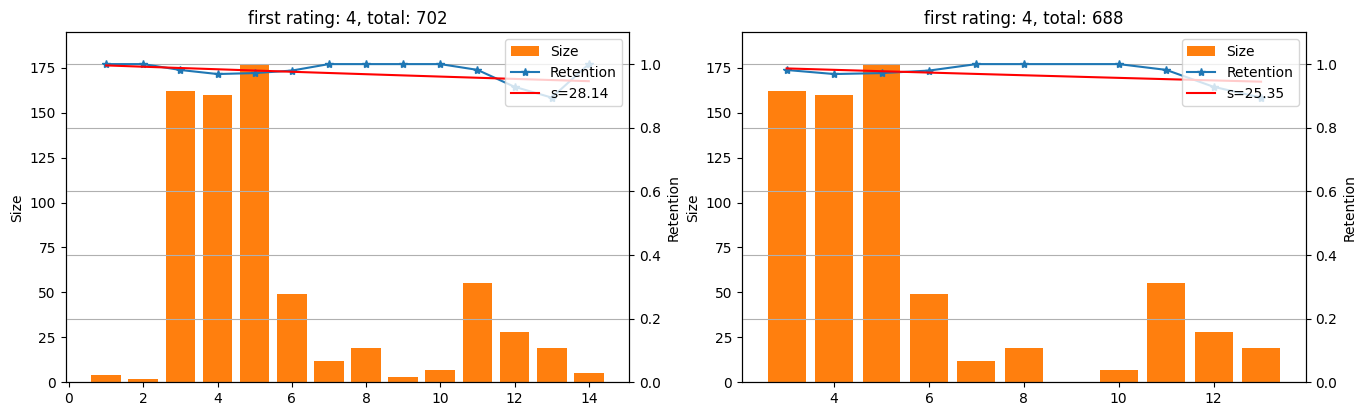

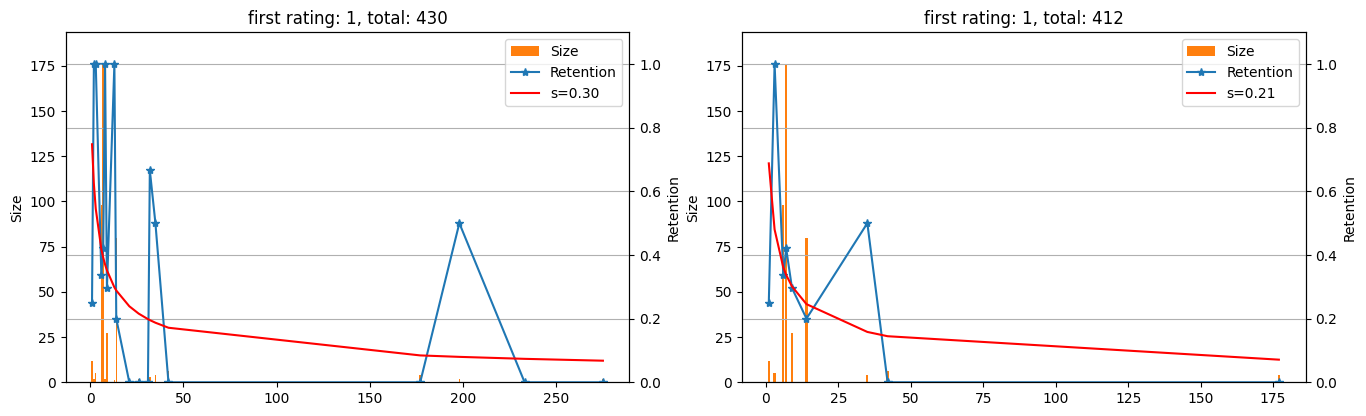

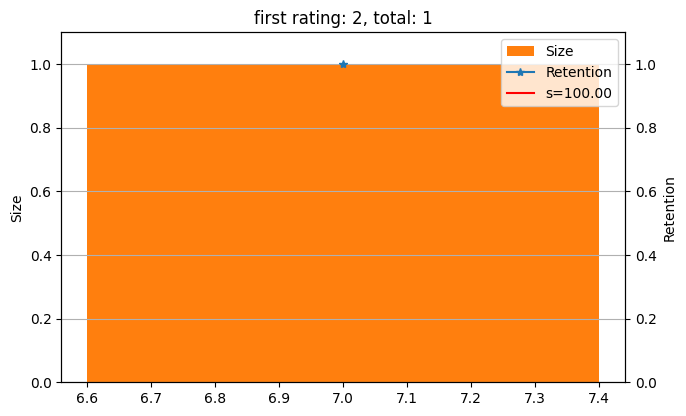

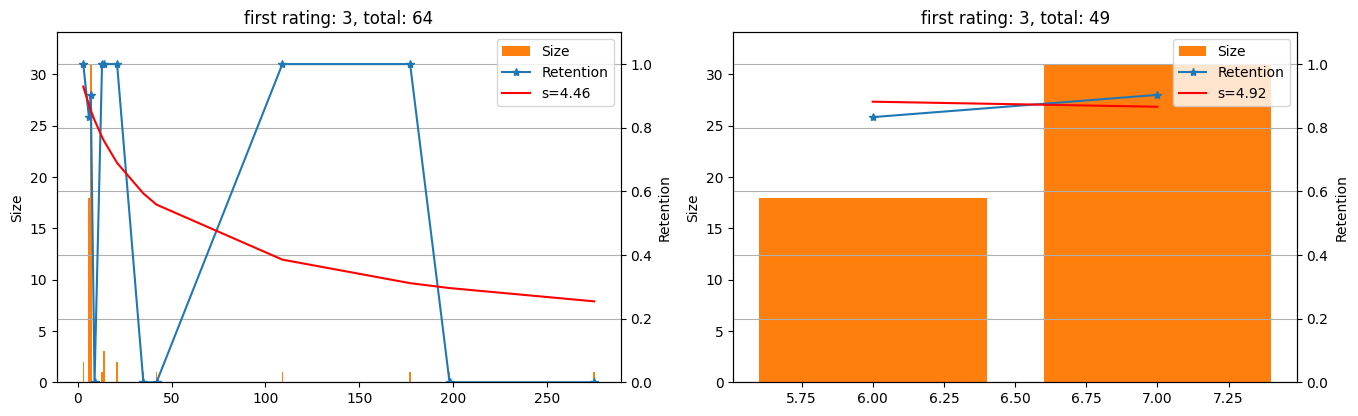

<Figure size 1600x1000 with 0 Axes>

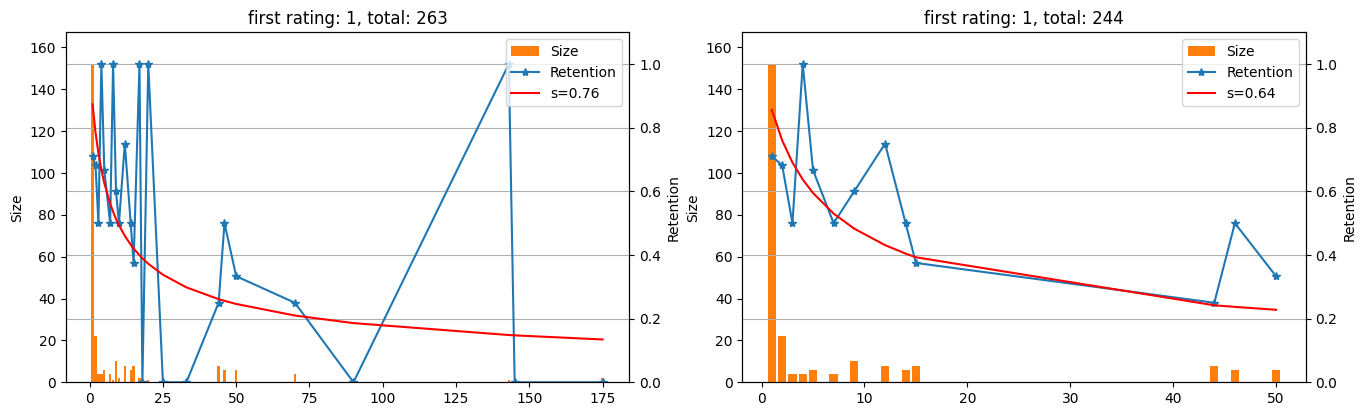

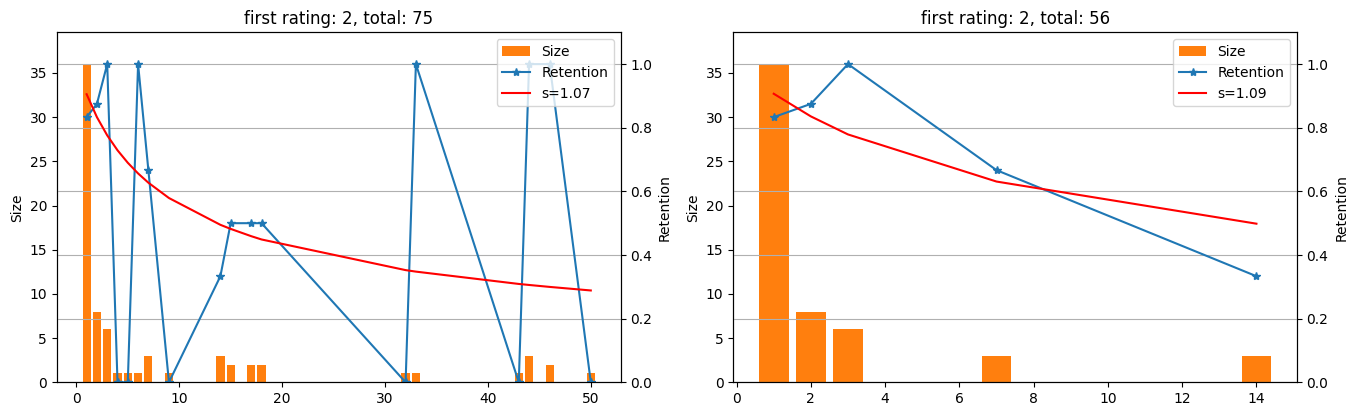

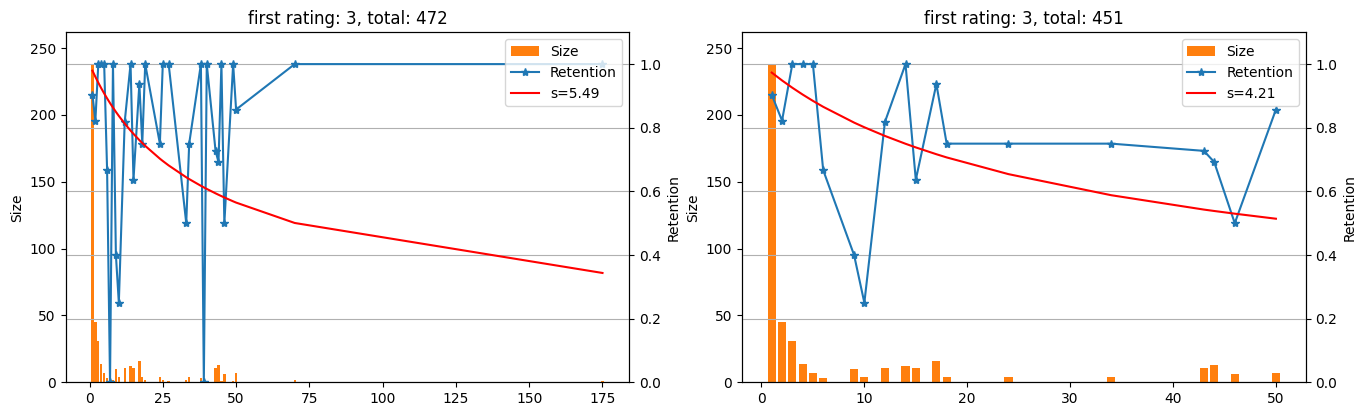

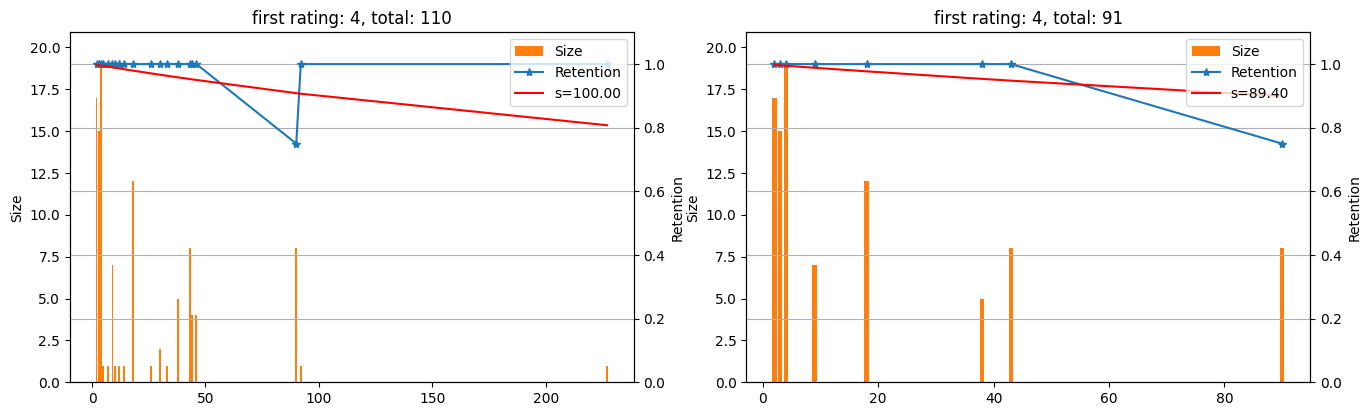

In [1]:
import pandas as pd
from pathlib import Path
from utils import *


def original_outlier_filter(group: pd.DataFrame) -> pd.DataFrame:
    grouped_group = (
        group.groupby(by=["r_history", "delta_t"], group_keys=False)
        .agg({"y": ["mean", "count"]})
        .reset_index()
    )
    sort_index = grouped_group.sort_values(
        by=[("y", "count"), "delta_t"], ascending=[True, False]
    ).index

    total = sum(grouped_group[("y", "count")])
    has_been_removed = 0
    for i in sort_index:
        count = grouped_group.loc[i, ("y", "count")]
        delta_t = grouped_group.loc[i, "delta_t"].values[0]
        if has_been_removed + count >= max(total * 0.05, 20):
            break
        else:
            if count < 6 or delta_t > 100:
                group.drop(group[group["delta_t"] ==
                           delta_t].index, inplace=True)
                has_been_removed += count
    return group


sorted_files = sorted(
    Path("../fsrs-benchmark/dataset").glob("*.csv"), key=lambda x: int(x.stem)
)[:4]


for path in sorted_files:
    df = create_time_series(pd.read_csv(path))
    outlier_analysis(df, original_outlier_filter)

0.6486486486486487 6
0.6486486486486487 6


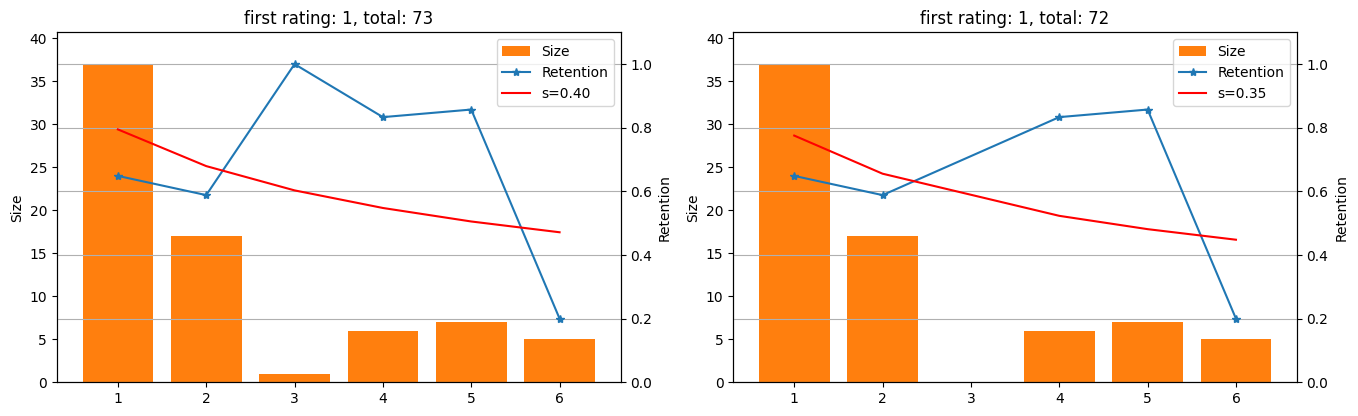

0.8571428571428571 14.937236057436323
0.8571428571428571 6


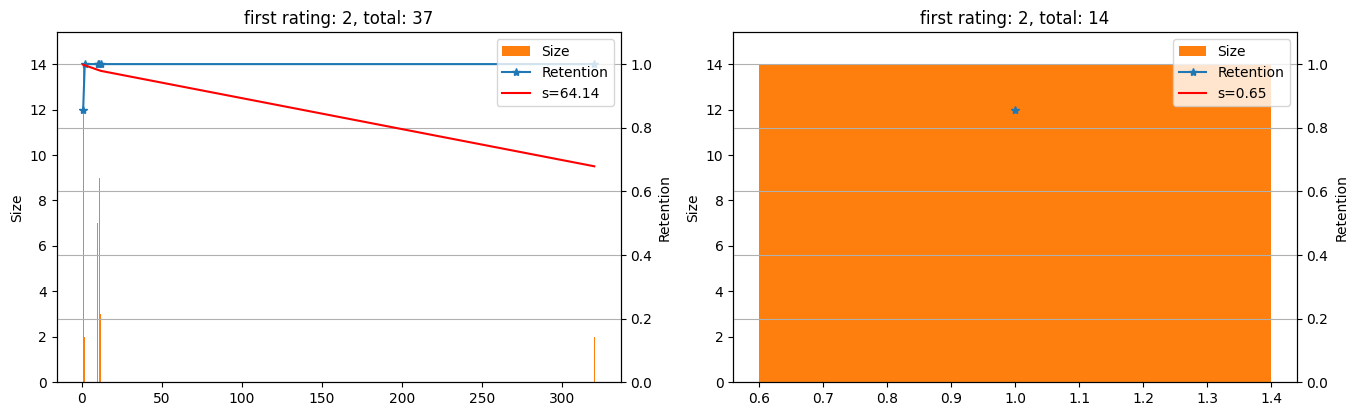

0.9510703363914373 45.89816449681745
0.9510703363914373 6


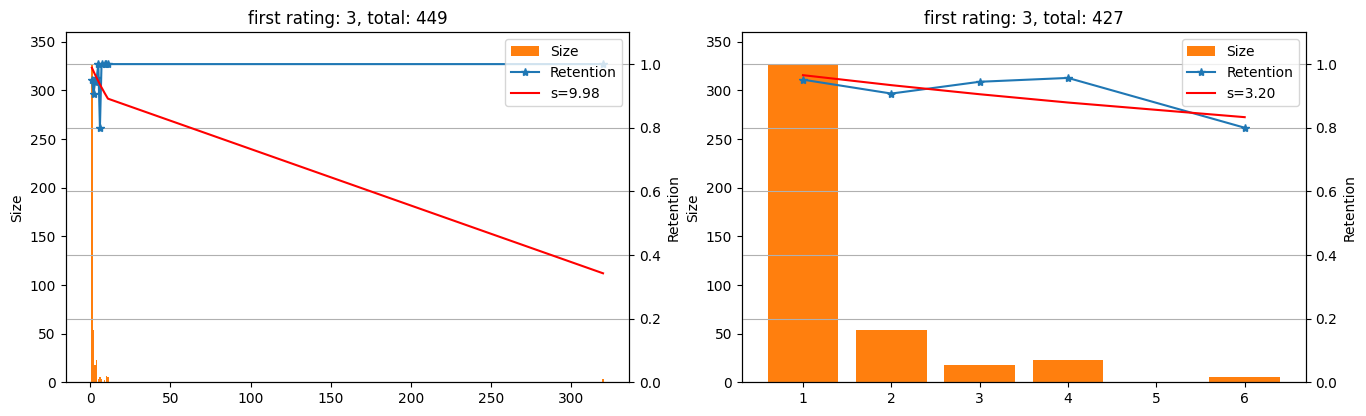

0.99 229.1052882766942
0.99 6


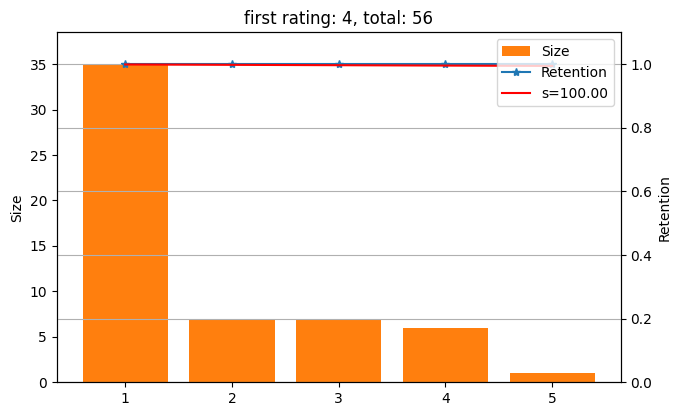

0.8373983739837398 12.975573126178656
0.8373983739837398 6


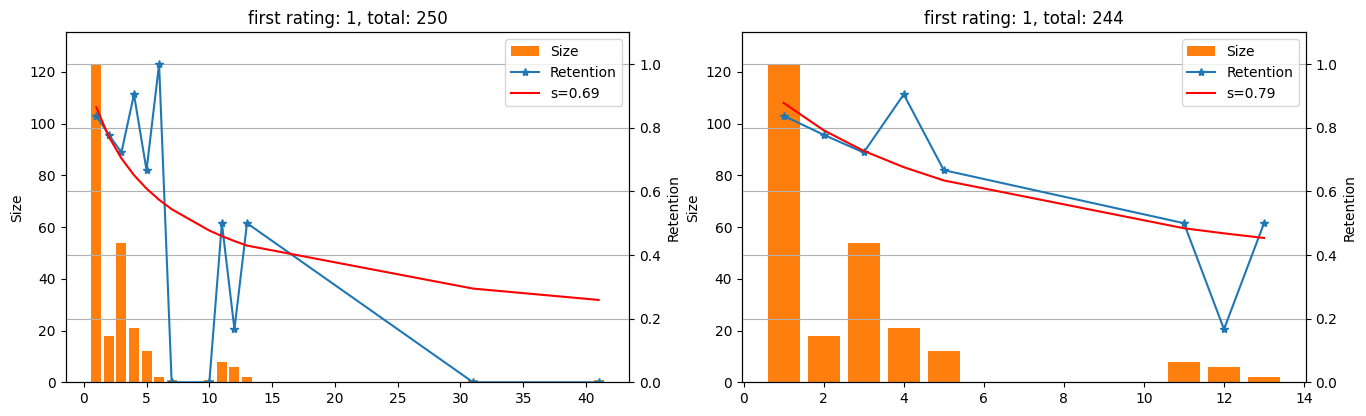

0.9166666666666666 26.463034750828875
0.9166666666666666 6


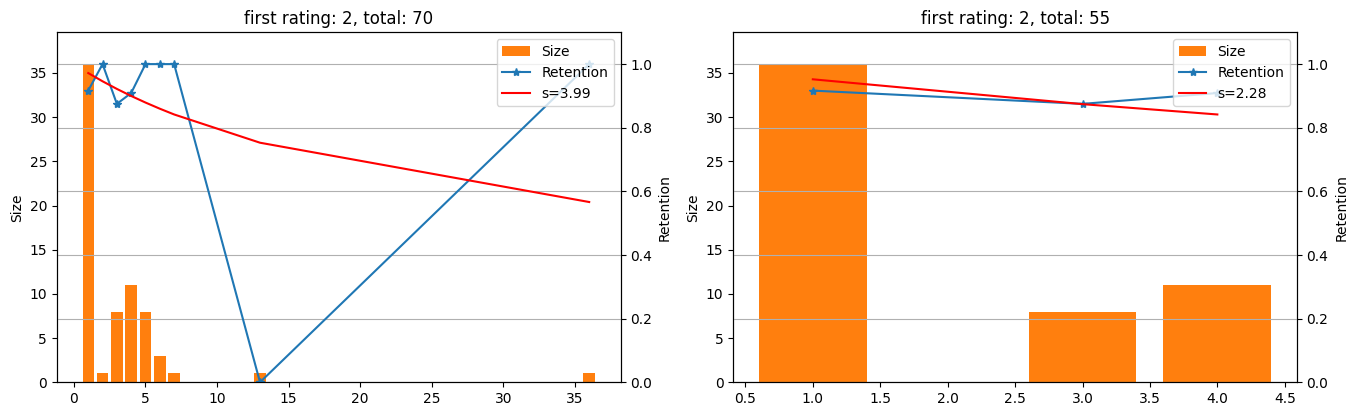

0.9355686626490576 34.572966004096884
0.9355686626490576 6


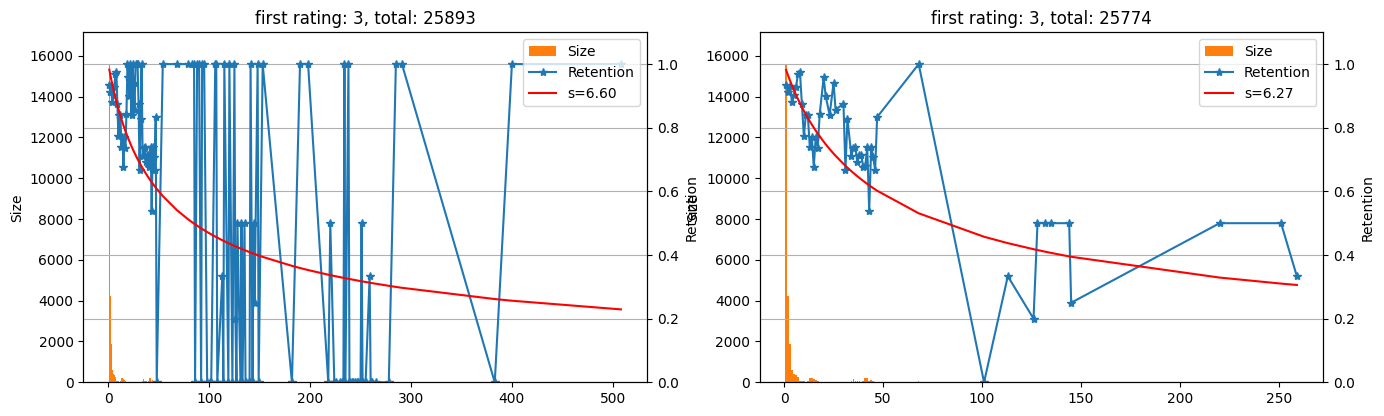

0.9717514124293786 80.3547213903432
0.9717514124293786 6


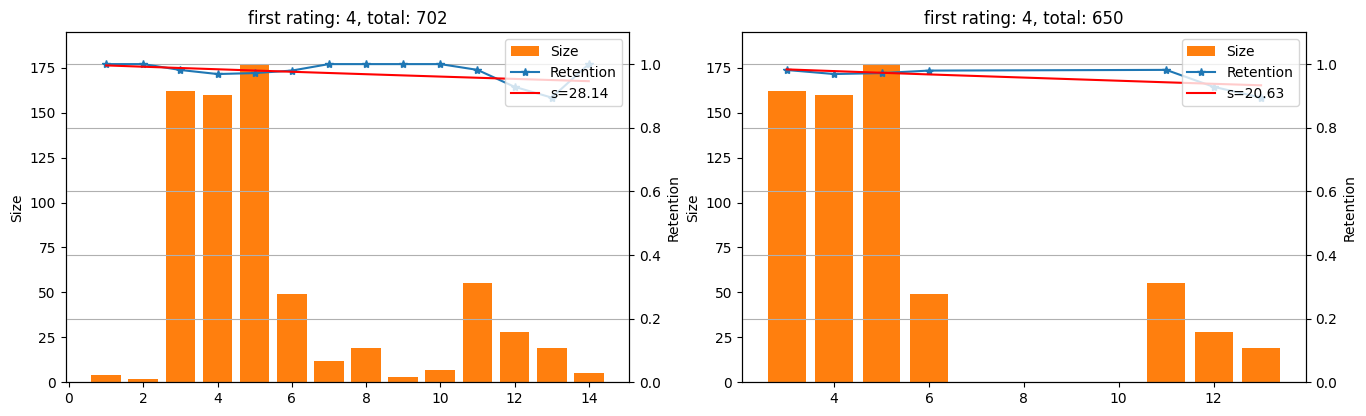

0.42045454545454547 6
0.42045454545454547 6


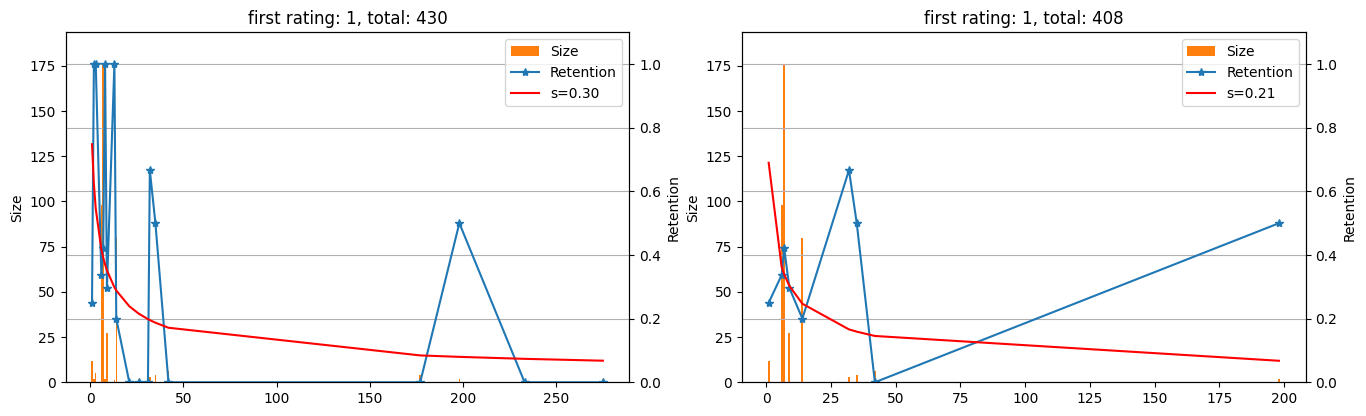

0.99 229.1052882766942
0.99 6


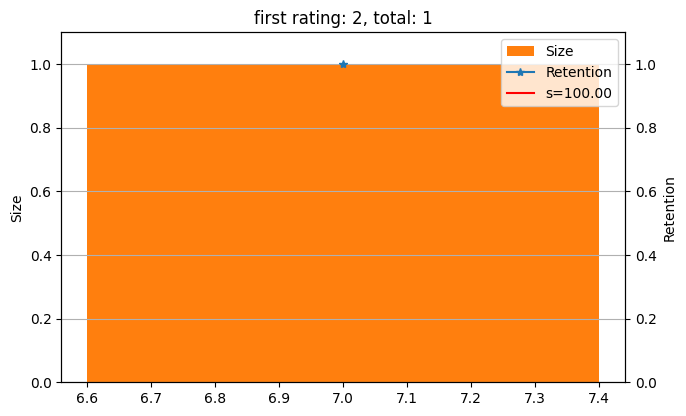

0.9032258064516129 22.62255984285851
0.9032258064516129 6


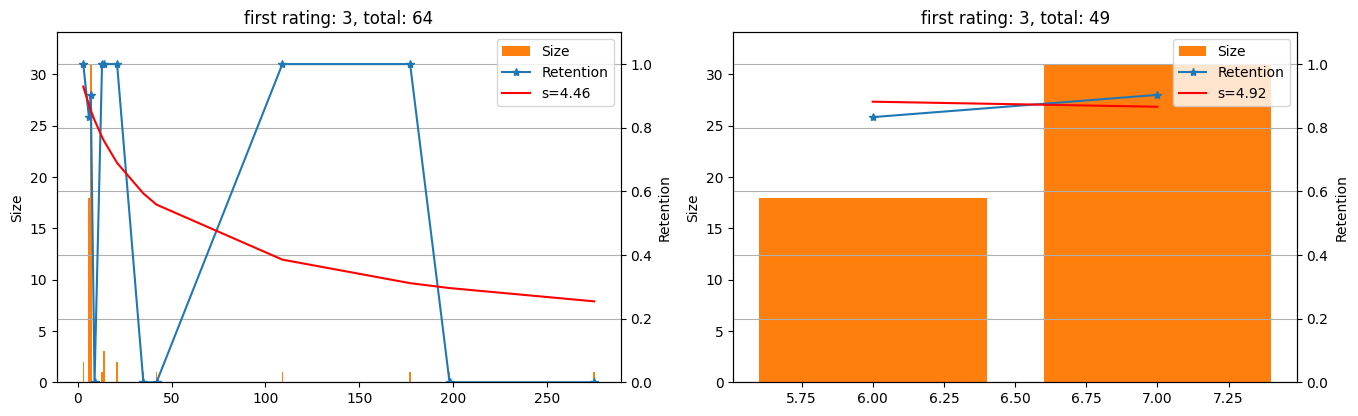

nan nan
nan nan


<Figure size 1600x1000 with 0 Axes>

0.7105263157894737 6.7376440428483475
0.7105263157894737 6


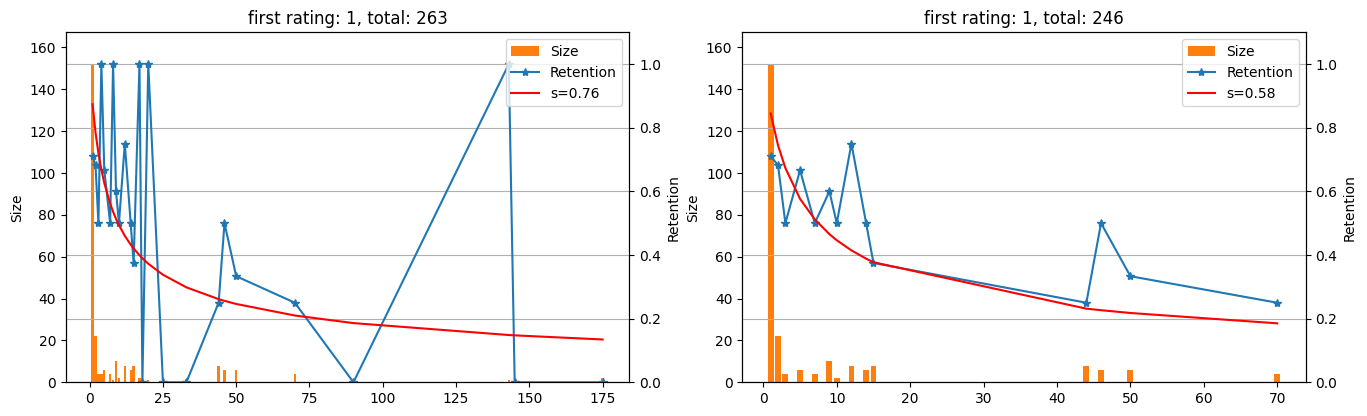

0.8333333333333334 12.629253136513336
0.8333333333333334 6


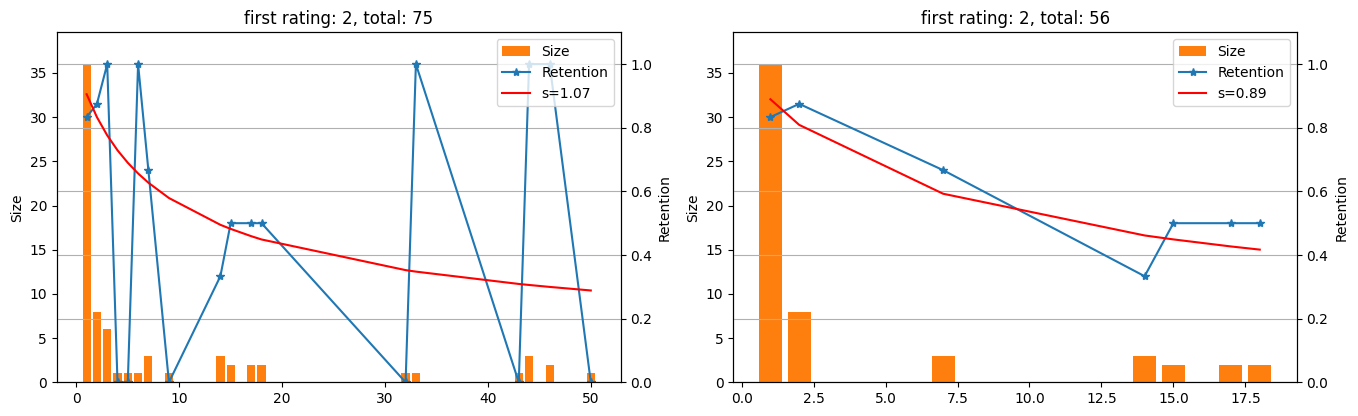

0.9033613445378151 22.655959418093126
0.9033613445378151 6


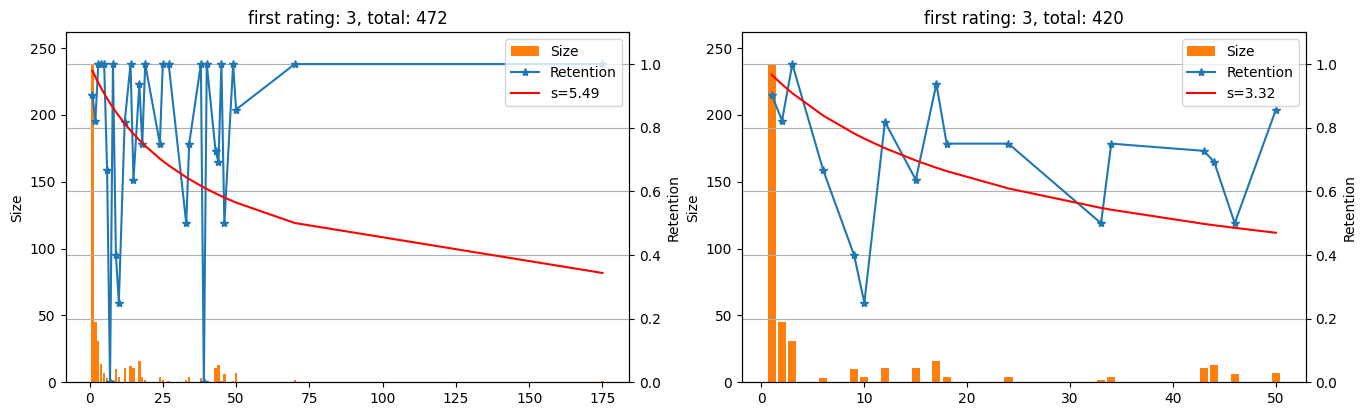

0.99 229.1052882766942
0.99 6


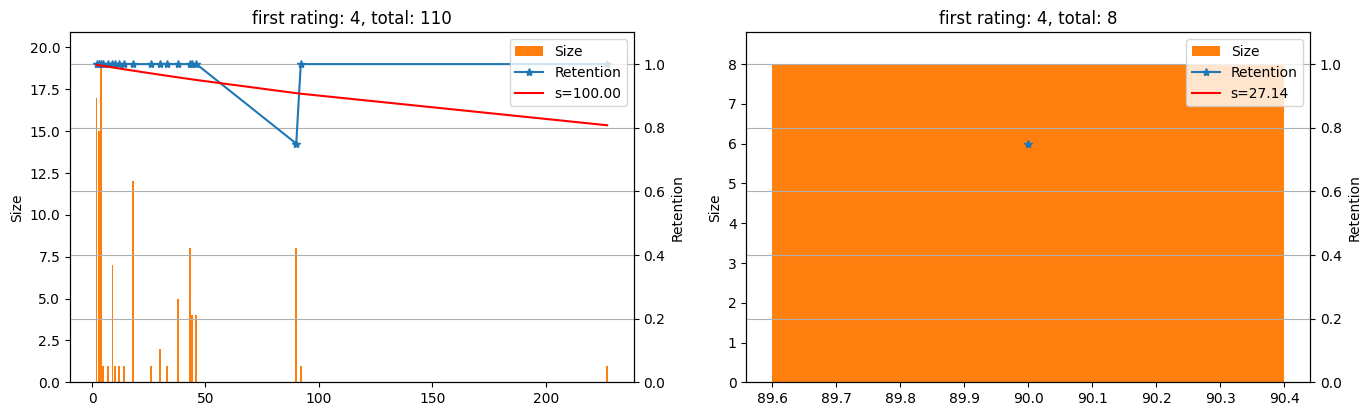

In [2]:
def simple_filter(group: pd.DataFrame) -> pd.DataFrame:
    grouped_group = (
        group.groupby(by=["r_history", "delta_t"], group_keys=False)
        .agg({"y": ["mean", "count"]})
        .reset_index()
    )
    believable_y_mean = grouped_group[grouped_group[("y", "count")] == grouped_group[("y", "count")].max()][("y", "mean")].mean()
    believable_y_mean = min(believable_y_mean, 0.99)
    believable_y_count = np.log(0.1) / np.log(believable_y_mean)
    believable_y_count = max(believable_y_count, 6)
    print(believable_y_mean, believable_y_count)
    outliers = grouped_group[(grouped_group[("y", "mean")] == 1.0) & (grouped_group[("y", "count")] < believable_y_count)]
    for i in outliers.index:
        delta_t = outliers.loc[i, "delta_t"].values[0]
        group.drop(group[group["delta_t"] == delta_t].index, inplace=True)

    believable_y_count = np.log(0.1) / np.log(1 - believable_y_mean)
    believable_y_count = max(believable_y_count, 6)
    print(believable_y_mean, believable_y_count)
    outliers = grouped_group[(grouped_group[("y", "mean")] == 0.0) & (grouped_group[("y", "count")] < believable_y_count)]
    for i in outliers.index:
        delta_t = outliers.loc[i, "delta_t"].values[0]
        group.drop(group[group["delta_t"] == delta_t].index, inplace=True)
    return group


sorted_files = sorted(
    Path("../fsrs-benchmark/dataset").glob("*.csv"), key=lambda x: int(x.stem)
)[:4]


for path in sorted_files:
    df = create_time_series(pd.read_csv(path))
    outlier_analysis(df, simple_filter)